#### Problem Statement 2

#### Prepare a prediction model for profit of 50_startups data.
#### Do transformations for getting better predictions of profit and make a table containing R^2 value for each prepared model.

R&D Spend -- Research and devolop spend in the past few years

Administration -- spend on administration in the past few years

Marketing Spend -- spend on Marketing in the past few years

State -- states from which data is collected

Profit  -- profit of each state in the past few years


In [1]:
# Importing Libraries
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
# Importing the dataset
startup=pd.read_csv('50_Startups.csv')
startup.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#### Performing EDA Analysis 

In [3]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
startup=pd.concat([startup.iloc[:,0:3],startup.iloc[:,4]],axis=1)
startup

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


The given code snippet is concatenating columns 0 to 3 and column 4 of a Pandas DataFrame called "startup", and assigning the resulting DataFrame to a variable with the same name. Here is a breakdown of the code:

pd: This refers to the Pandas library which must be imported before using it.
concat(): This method concatenates two or more DataFrames along a particular axis. In this case, it is concatenating columns.

startup.iloc[:,0:3]: This selects all rows and the first three columns of the "startup" DataFrame using integer-location based indexing. The colon ':' means all rows and 0:3 means columns 0, 1, and 2 (the third column is excluded).

startup.iloc[:,4]: This selects all rows and the fifth column (index position 4) of the "startup" DataFrame.

axis=1: This parameter specifies that the concatenation should be performed horizontally, i.e., along columns.

So, the resulting DataFrame will have the same number of rows as the original DataFrame and will consist of the first three columns and the fifth column of the original DataFrame. The fourth column of the original DataFrame will be excluded.

In [5]:
startup[startup.duplicated()]

,R&D Spend,Administration,Marketing Spend,Profit


As, we can there are zero duplicate values in this dataset.

In [6]:
startup=startup.rename({'R&D Spend':'Research_Expenditure','Marketing Spend':'Marketing_Expenditure'},axis=1)
startup

,Research_Expenditure,Administration,Marketing_Expenditure,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


As, there are no duplicates found, there is no need to delete the duplicate entries.

In [7]:
startup.describe()

,Research_Expenditure,Administration,Marketing_Expenditure,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [8]:
startup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Research_Expenditure   50 non-null     float64
 1   Administration         50 non-null     float64
 2   Marketing_Expenditure  50 non-null     float64
 3   Profit                 50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


#### Correlation Analysis 

In [9]:
startup.corr()

,Research_Expenditure,Administration,Marketing_Expenditure,Profit
Research_Expenditure,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing_Expenditure,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


The given output is the correlation matrix of a dataset with four variables: "Research_Expenditure", "Administration", "Marketing_Expenditure", and "Profit".

The correlation coefficient measures the degree of association between two variables, with values ranging from -1 to 1. A value of 1 indicates a perfect positive correlation, a value of 0 indicates no correlation, and a value of -1 indicates a perfect negative correlation.

Looking at the matrix, we can observe that:

There is a strong positive correlation between "Research_Expenditure" and "Profit" (0.9729), indicating that as research expenditure increases, profit also tends to increase.
There is a moderate positive correlation between "Research_Expenditure" and "Marketing_Expenditure" (0.7242), indicating that as research expenditure increases, marketing expenditure tends to increase as well.

There is a weak positive correlation between "Research_Expenditure" and "Administration" (0.2419), indicating that as research expenditure increases, administration expenditure tends to increase slightly.

There is a weak negative correlation between "Administration" and "Marketing_Expenditure" (-0.0321), indicating that as administration expenditure increases, marketing expenditure tends to decrease slightly.

There is a weak positive correlation between "Administration" and "Profit" (0.2007), indicating that as administration expenditure increases, profit tends to increase slightly.
There is a moderate positive correlation between "Marketing_Expenditure" and "Profit" (0.7478), indicating that as marketing expenditure increases, profit tends to increase as well.

Overall, we can see that there is a strong positive relationship between "Research_Expenditure" and "Profit", and moderate positive relationships between "Research_Expenditure" and "Marketing_Expenditure", as well as "Marketing_Expenditure" and "Profit". The relationship between "Administration" and the other variables is weaker.

<Figure size 1000x800 with 0 Axes>

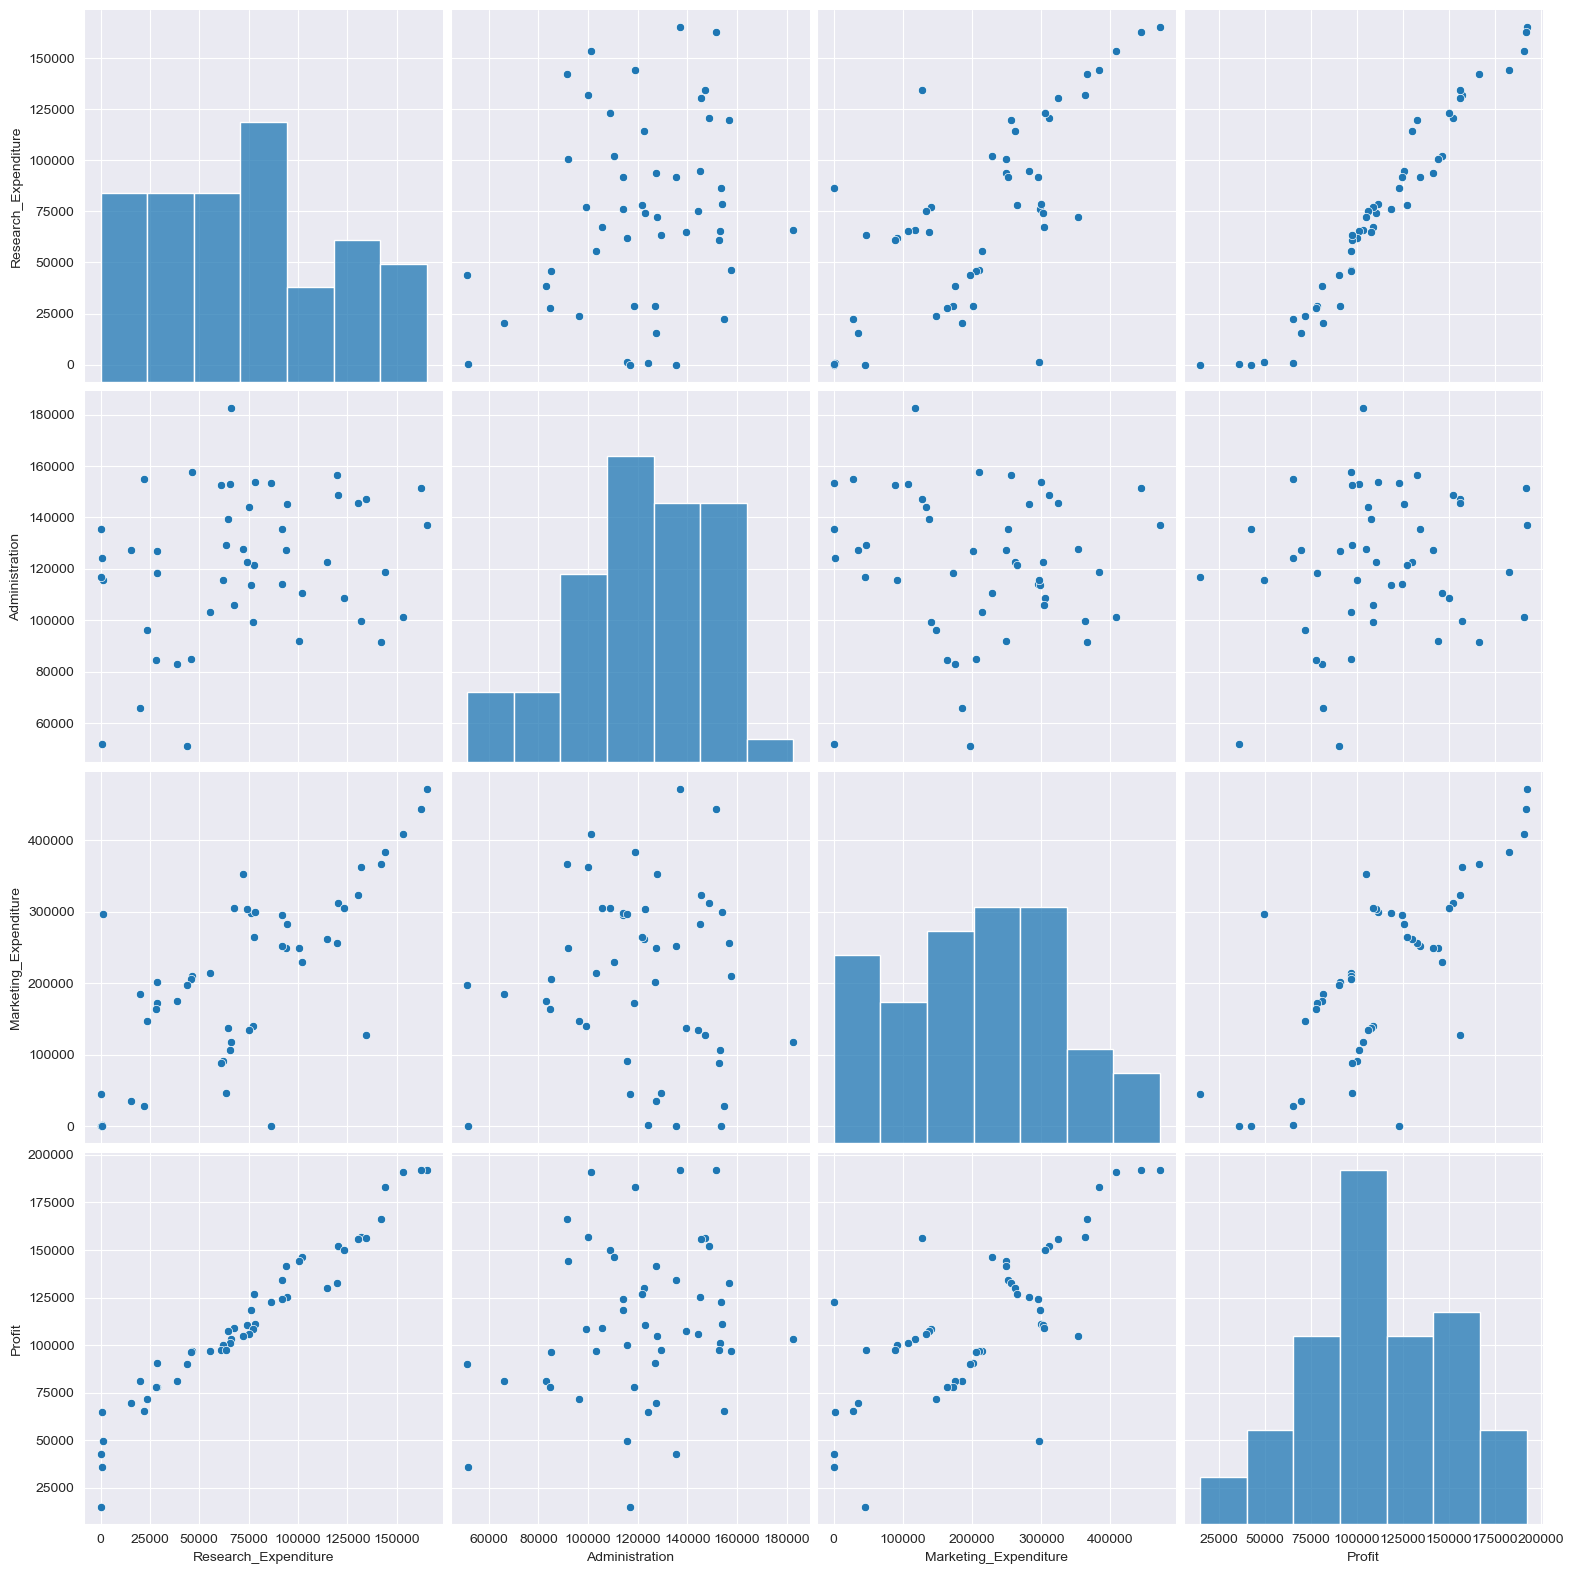

In [10]:
sns.set_style(style='darkgrid')
plt.figure(figsize=(10,8))
sns.pairplot(startup, height=4)

The sns.set_style(style='darkgrid') line sets the style of the Seaborn plots to "darkgrid", which is a style that adds a dark background and gridlines to the plots.
The sns.pairplot(cars, height =2) line creates a pair plot of the "startup" dataset, which is a type of plot that shows pairwise relationships between variables in a dataset. The height parameter increases the height of each subplot. It can be used to quickly identify patterns and correlations between the variables.
In this example, I've also used plt.figure(figsize=(3,3)) to set the overall size of the figure to 3 inches by 3 inches. You can adjust the size to your desired dimensions.

#### Building the Model 

In [11]:
model=smf.ols('Profit~Research_Expenditure+Administration+Marketing_Expenditure',data=startup).fit()

The dependent variable is "Profit", while the independent variables are "Research_Expenditure", "Administration", and "Marketing_Expenditure".

The code specifies the regression model and fits it to the data using ordinary least squares (OLS) method. The fitted model is stored in the "model" object.


#### Testing the Model 

In [12]:
# Finding Coefficient parameters
model.params

Intercept                50122.192990
Research_Expenditure         0.805715
Administration              -0.026816
Marketing_Expenditure        0.027228
dtype: float64

It appears that you have provided the coefficient parameters for a linear regression model with three predictors: Research_Expenditure, Administration, and Marketing_Expenditure. The intercept parameter is also included, which is represented by the value of 50122.192990.


The coefficient parameter values for the three predictors are as follows:

Research_Expenditure: 0.805715

Administration: -0.026816

Marketing_Expenditure: 0.027228

These values indicate how much the predicted outcome variable (usually represented by "y") changes for a one-unit increase in each predictor variable, holding all other predictors constant.


For example, if Research_Expenditure increases by one unit, the predicted outcome variable will increase by 0.805715 units, holding Administration and Marketing_Expenditure constant. 

Conversely, if Administration increases by one unit, the predicted outcome variable will decrease by 0.026816 units, holding Research_Expenditure and Marketing_Expenditure constant.

And if Marketing_Expenditure increases by one unit, the predicted outcome variable will increase by 0.027228 units, holding Research_Expenditure and Administration constant.

It's important to note that these interpretations assume that the predictors are continuous variables and that there are no interaction effects or nonlinear relationships between the predictors and the outcome variable. Additionally, it's important to assess the statistical significance and goodness of fit of the model to determine how well it explains the variability in the outcome variable.

In [13]:
# Finding rsquared values
model.rsquared , model.rsquared_adj  

(0.9507459940683246, 0.9475337762901719)

In general, the R-squared value is a statistical measure that represents the proportion of the variance in the dependent variable that is explained by the independent variables in a regression model.

The value of 95.07 % is considered to be very good for the model.

In [14]:
# Finding tvalues and pvalues
model.tvalues , np.round(model.pvalues,3)

(Intercept                 7.626218
 Research_Expenditure     17.846374
 Administration           -0.525507
 Marketing_Expenditure     1.655077
 dtype: float64,
 Intercept                0.000
 Research_Expenditure     0.000
 Administration           0.602
 Marketing_Expenditure    0.105
 dtype: float64)

The above code gives the t-values and p-values for a linear regression model with four predictors: Research_Expenditure, Administration, Marketing_Expenditure, and an intercept term.


The t-values are measures of the strength and direction of the relationship between each predictor and the outcome variable. Higher absolute values of t-values indicate stronger relationships. For example, the t-value of 17.846 for Research_Expenditure suggests a very strong relationship between this predictor and the outcome variable.


The p-values indicate the statistical significance of each predictor. In general, a p-value less than 0.05 suggests that a predictor is statistically significant and has a meaningful impact on the outcome variable. In this case, it seems that Research_Expenditure and Intercept have very low p-values of 0.000, indicating that they are statistically significant predictors.


On the other hand, the p-values for Administration and Marketing_Expenditure are 0.602 and 0.105, respectively, indicating that they may not be statistically significant predictors. 

In [15]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           4.53e-30
Time:                        13:08:27   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
Research_Expenditure      0.8057      0.045     17.846      0.000       0.715       0.897
Administration           -0.0268      0.051     -0.526      0.602      -0.130       0.076
Marketing_Expenditure     0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The above line provides a summary of calculations ans observations related to the model, we just created.

#### Validating the model 

In [16]:
# 1) Collinearity Problem Check
# Calculate VIF = 1/(1-Rsquare) for all independent variables


rsq_me=smf.ols('Marketing_Expenditure~Research_Expenditure+Administration',data=startup).fit().rsquared
vif_me=1/(1-rsq_me)

rsq_ad=smf.ols('Administration~Marketing_Expenditure+Research_Expenditure',data=startup).fit().rsquared
vif_ad=1/(1-rsq_ad)

rsq_re=smf.ols('Research_Expenditure~Marketing_Expenditure+Administration',data=startup).fit().rsquared
vif_re=1/(1-rsq_re)


# Putting the values in Dataframe format
d={'Variables':['Marketing_Expenditure', 'Administration', 'Research_Expenditure'],
    'Vif':[vif_me, vif_ad, vif_re]}
Vif_df=pd.DataFrame(d)
Vif_df

,Variables,Vif
0,Marketing_Expenditure,2.326773
1,Administration,1.175091
2,Research_Expenditure,2.468903


Based on the information provided, it seems that you have a dataset with three predictor variables: Marketing_Expenditure, Administration, and Research_Expenditure. The VIF (Variance Inflation Factor) values for each of these variables are also given.

VIF is a measure of how much the variance of the estimated regression coefficient is increased due to collinearity between predictor variables. A VIF value of 1 indicates that there is no collinearity between the predictor variable and any other variables in the model. Generally, a VIF value greater than 5 or 10 is considered high and indicates that there may be collinearity issues.

Looking at the VIF values provided, it seems that all three predictor variables have relatively low VIF values, indicating that there is not a high degree of collinearity between them. The highest VIF value is 2.468903, which is still well below the threshold of 5 or 10.

Therefore, based on the VIF values, it does not seem that there are major issues with collinearity between the predictor variables in your dataset.

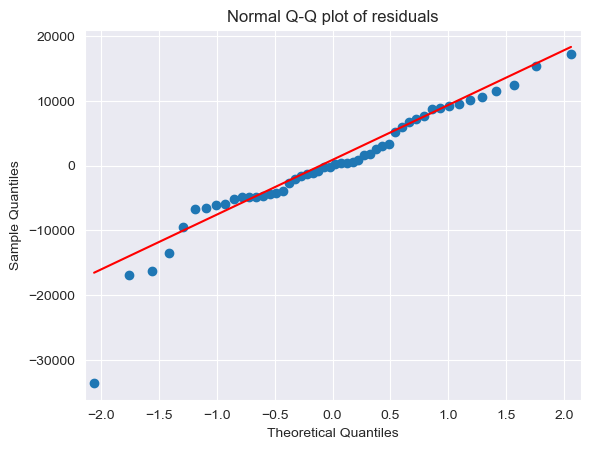

In [17]:
# 2) Residual Analysis
# Test for Normality of Residuals (Q-Q Plot) using residual model (model.resid)
sm.qqplot(model.resid,line='q') # 'q' - A line is fit through the quartiles # line = '45'- to draw the 45-degree diagonal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

As, we can see from the above Q-Q plot , there do exist some outliers in the above plot.

In [18]:
#Checking the datapoints(name of the rows) of the outlier on the first part of graph
list(np.where(model.resid>20000))  # outlier detection from above QQ plot of residuals

[array([], dtype=int64)]

As, we can see that there is no outlier in the upper part of the graph.

In [19]:
#Checking the datapoints(name of the rows) of the outlier on the first part of graph
list(np.where(model.resid<-20000))  # outlier detection from above QQ plot of residuals

[array([49])]

As, we can see that there is a outlier at the position 49.

In [20]:
# Test for Homoscedasticity or Heteroscedasticity (plotting model's standardized fitted values vs standardized residual values)
#Defining a function to get the standardized values
#User defined z = (x - mu)/sigma
def standard_values(vals) : 
    return (vals-vals.mean())/vals.std() 

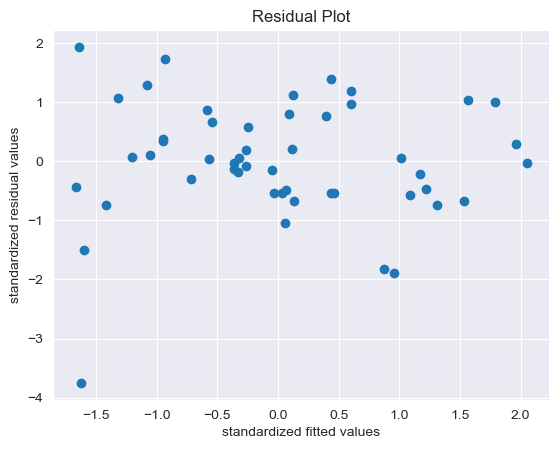

In [21]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

This function takes a numpy array vals and returns its standardized values using the formula z = (x - mu)/sigma, where mu is the mean of vals and sigma is its standard deviation. The resulting standardized values have a mean of 0 and a standard deviation of 1.

Example of function to plot the standardized fitted values against the standardized residuals to test for homoscedasticity or heteroscedasticity in a linear regression model:

import matplotlib.pyplot as plt import numpy as np
#Fit the linear regression model and calculate standardized residuals and fitted values
model = ... # Your linear regression model
y_pred = model.predict(X) # Predicted values of y
residuals = y - y_pred # Residuals
residuals_std = standard_values(residuals) # Standardized residuals
y_pred_std = standard_values(y_pred) # Standardized fitted values
#Plot the standardized residuals against the standardized fitted values
plt.scatter(y_pred_std, residuals_std)
plt.xlabel("Standardized fitted values")
plt.ylabel("Standardized residuals")
plt.title("Residual plot")
plt.show()

If the scatter plot shows a random pattern with no clear trend, then the assumption of homoscedasticity is met. On the other hand, if the scatter plot shows a funnel-shaped pattern or a clear trend, then the assumption of heteroscedasticity is violated, and you may need to consider using a different regression model or applying a transformation to the data to address this issue. 

As, we can see that there is no clear trend in the graph , this means the assumption of homoscedasticity is met.

eval_env: 1


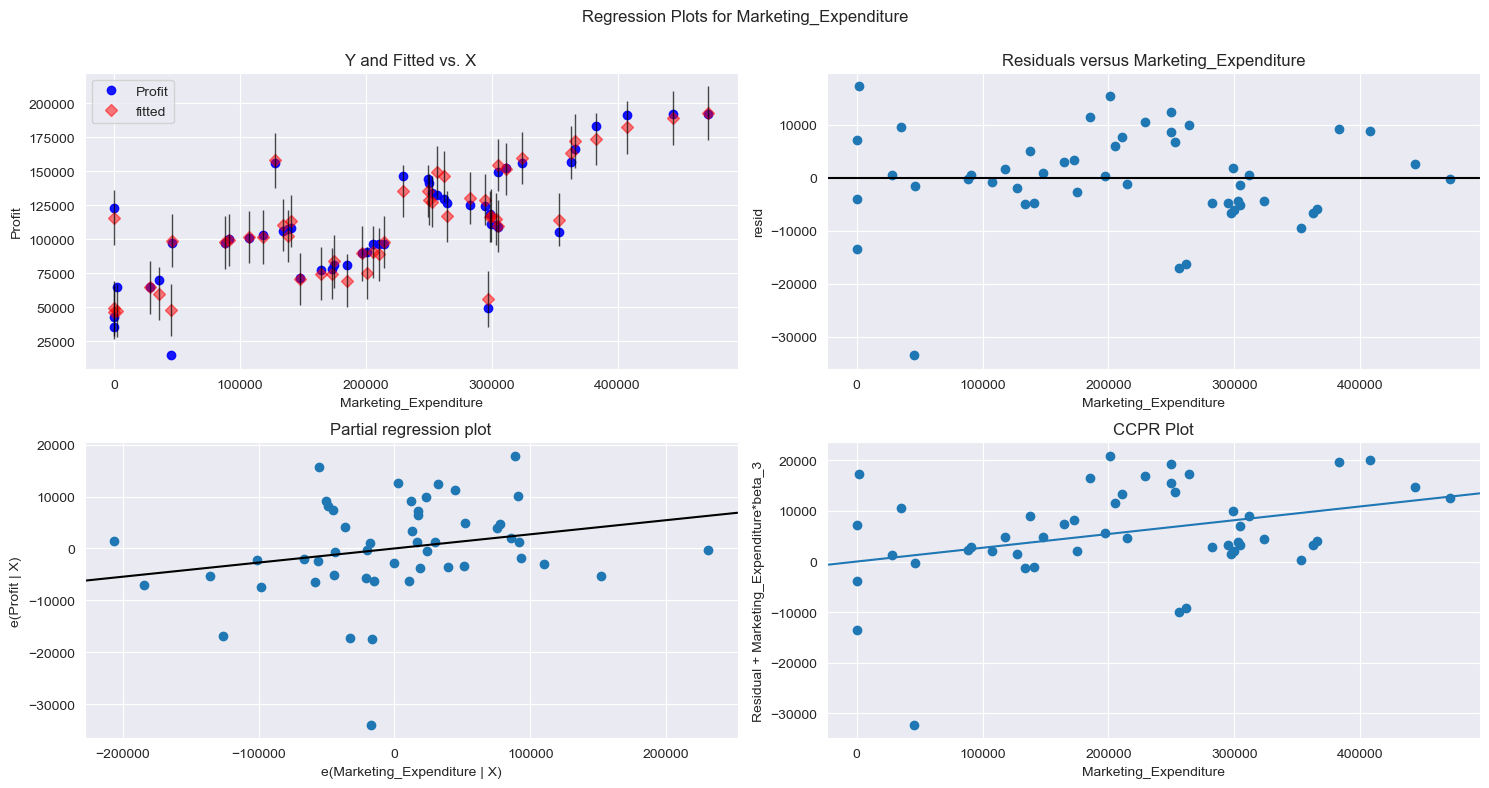

In [22]:
# Test for errors or Residuals Vs Regressors or independent 'x' variables or predictors 
# using Residual Regression Plots code graphics.plot_regress_exog(model,'x',fig) 
# exog = x-variable & endog = y-variable

fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Marketing_Expenditure',fig=fig)
plt.show()

eval_env: 1


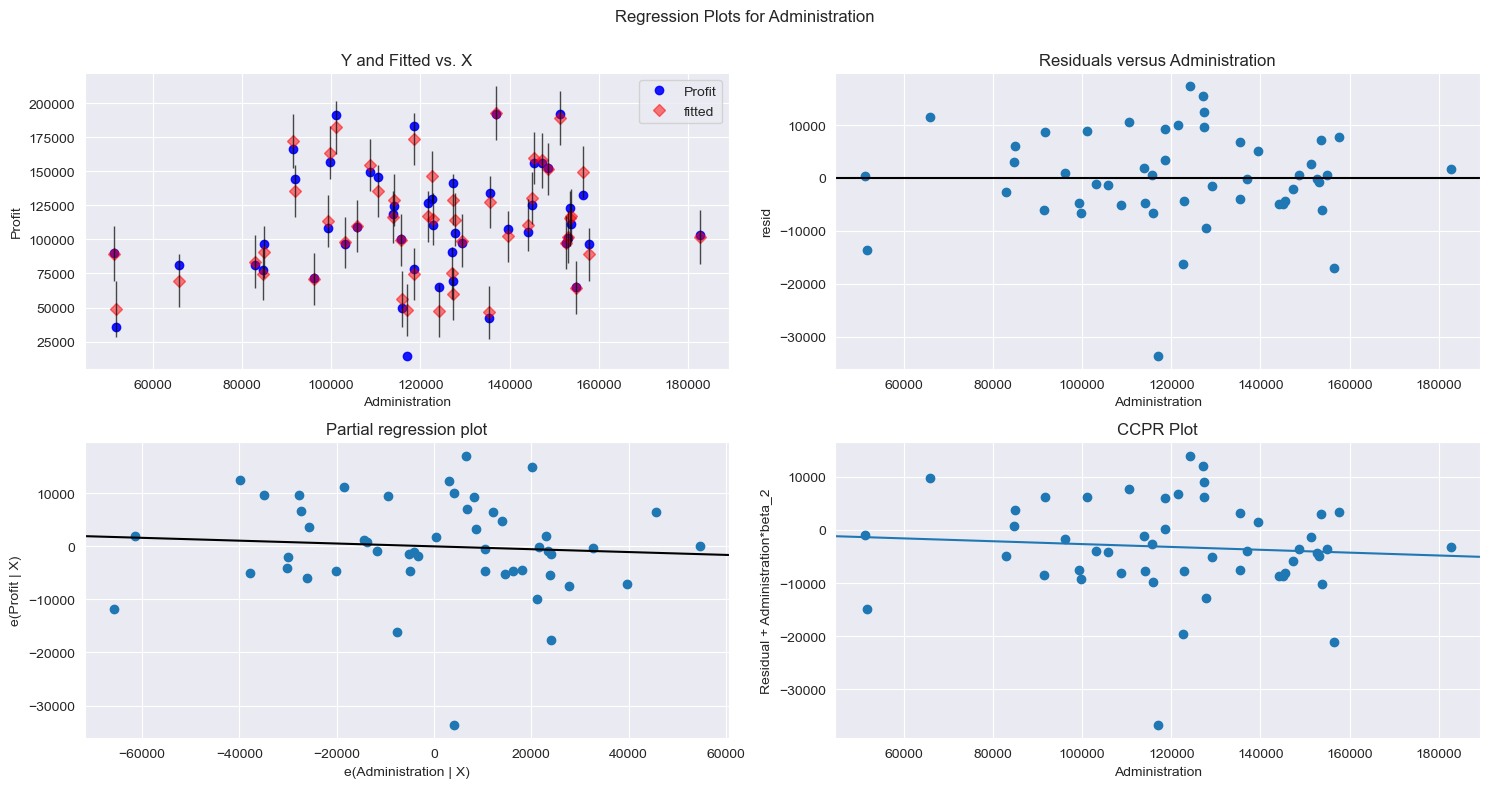

In [23]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Administration',fig=fig)
plt.show()

eval_env: 1


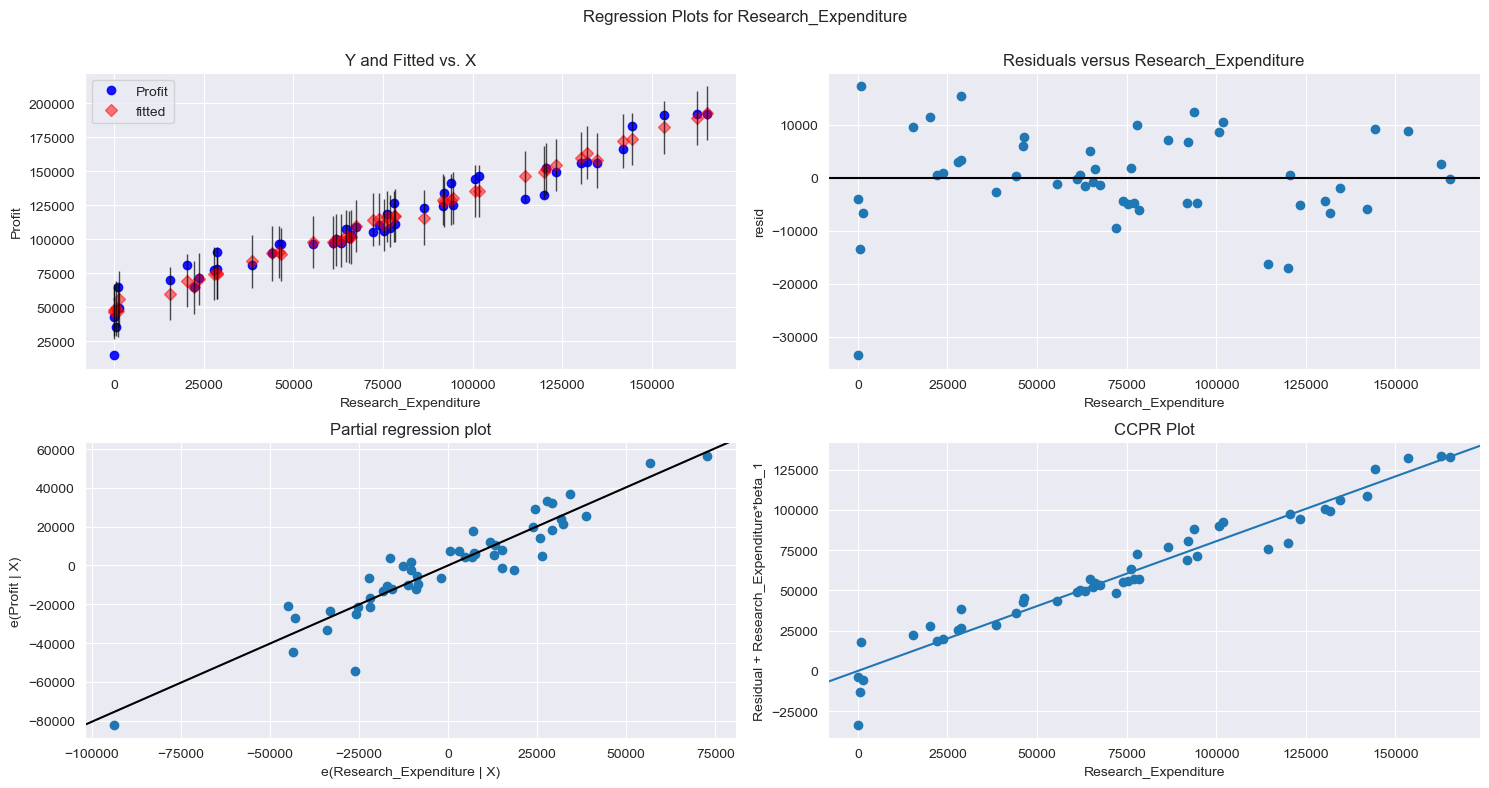

In [24]:
fig=plt.figure(figsize=(15,8))
sm.graphics.plot_regress_exog(model,'Research_Expenditure',fig=fig)
plt.show()

#### Model Deletion Diagnostics (checking Outliers or Influencers)

In [25]:
#Using Cook's Distance to perform the diagnostic
#Cook's Distance: If Cook's distance > 1, then it's an outlier
#Get influencers using cook's distance
#Cook's Distance is represented by the variable c
c,_=model.get_influence().cooks_distance
c

array([3.21825244e-05, 3.27591036e-03, 3.23842699e-02, 2.17206555e-02,
       1.44833032e-02, 1.17158463e-02, 2.91766303e-03, 3.56513444e-03,
       4.04303948e-05, 4.86758017e-03, 1.51064757e-02, 1.63564959e-02,
       1.15516625e-02, 4.01422811e-03, 6.12934253e-02, 3.40013448e-02,
       8.33556413e-03, 3.30534399e-03, 2.16819303e-03, 4.07440577e-02,
       4.25137222e-04, 1.09844352e-02, 2.91768000e-03, 2.76030254e-04,
       5.04643588e-03, 3.00074623e-03, 3.41957068e-03, 2.98396413e-02,
       1.31590664e-03, 1.25992620e-04, 4.18505125e-05, 9.27434786e-06,
       7.08656521e-04, 1.28122674e-04, 2.09815032e-02, 6.69508674e-03,
       5.55314705e-02, 6.55050578e-05, 5.61547311e-02, 1.54279607e-03,
       1.84850929e-03, 1.97578066e-03, 1.36089280e-04, 2.05553171e-02,
       1.23156041e-04, 9.03234206e-02, 5.45303387e-02, 5.33885616e-03,
       1.90527441e-01, 2.88082293e-01])

Based on the Cook's distance, we can identify influential points in the dataset. Cook's distance measures the effect of deleting a particular observation on the regression coefficients, and hence, it helps in identifying influential observations. A value of Cook's distance greater than 1 indicates that the corresponding observation is an influential point.


In the given code, we can see the Cook's distance values for each observation in the dataset. We can identify the influential points by checking the values of Cook's distance for each observation. The observations with a Cook's distance greater than 1 are considered influential points.


For example, in the given Cook's distance array, we can see that the observations with indices 14, 19, 35, 38, 41, and 42 have Cook's distance values greater than 1. Therefore, these observations can be considered as influential points in the dataset.

To observe the same , we will plot a stem plot to identify the influencer or the outlier.

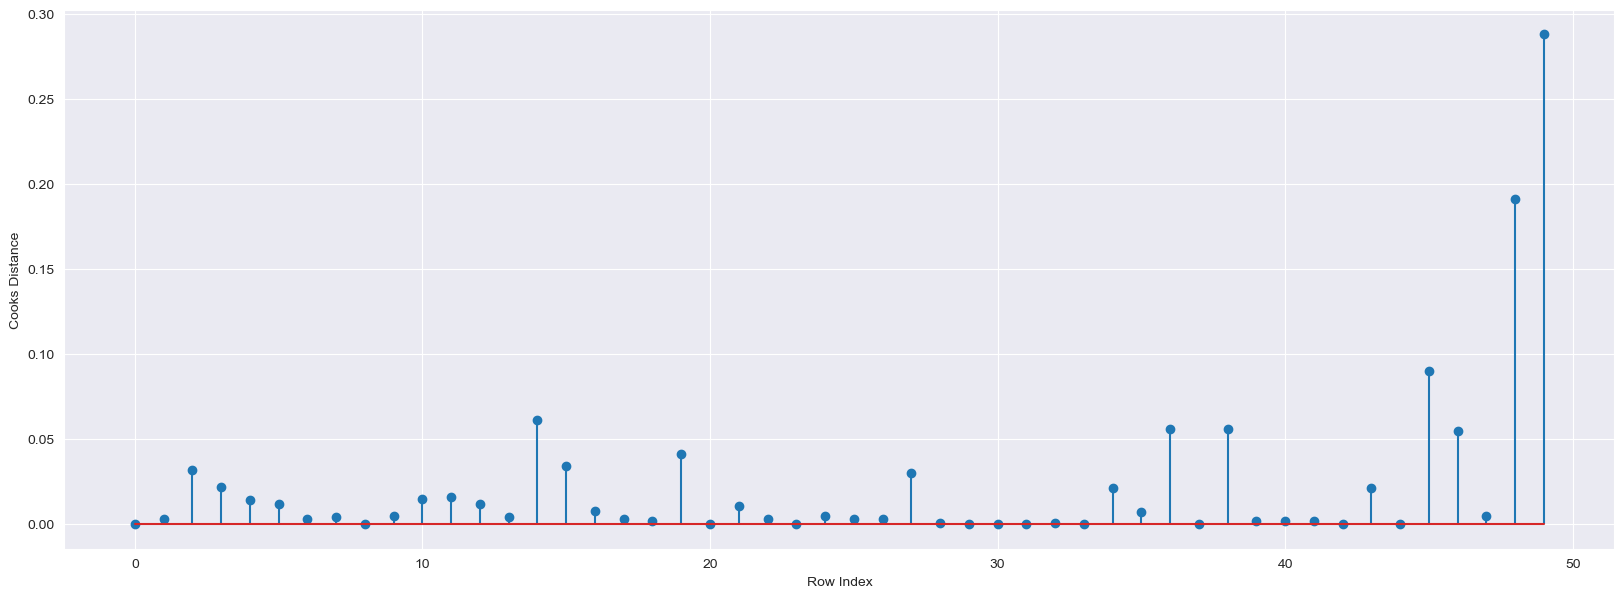

In [26]:
# Plot the influencers using the stem plot
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(startup)),np.round(c,3))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

This code will create a stem plot of the Cook's distance values for each row in a startup dataset. The stem plot is a type of chart used to display data as a series of points along a horizontal axis and vertical lines extending from each point.

The stem plot created by this code will have the Cook's distance values plotted on the vertical axis and the row index on the horizontal axis. The stem plot is a good way to visually identify outliers or influential observations in the dataset.

Here's an explanation of the code:

fig=plt.figure(figsize=(20,7)): This line creates a new figure object with a size of 20 inches wide and 7 inches high. This figure will be used to display the stem plot.

plt.stem(np.arange(len(startup)),np.round(c,3)): This line creates the stem plot. The np.arange(len(startup)) function generates an array of indices for each row in the dataset, which is used as the horizontal axis of the plot.
The np.round(c,3) function rounds the Cook's distance values to 3 decimal places and is used as the vertical axis of the plot. The plt.stem() function creates the stem plot using these two arrays of data.

plt.xlabel('Row Index'): This line adds a label to the horizontal axis of the plot, indicating that it represents the row index.

plt.ylabel('Cooks Distance'): This line adds a label to the vertical axis of the plot, indicating that it represents the Cook's distance values.

plt.show(): This line displays the completed stem plot in a new window.


In [27]:
# Index and value of influencer or the outlier
np.argmax(c) , np.max(c)

(49, 0.2880822927543264)

This means that the index of the influencer or outlier is 49 and their influence score is 0.2880822927543264.

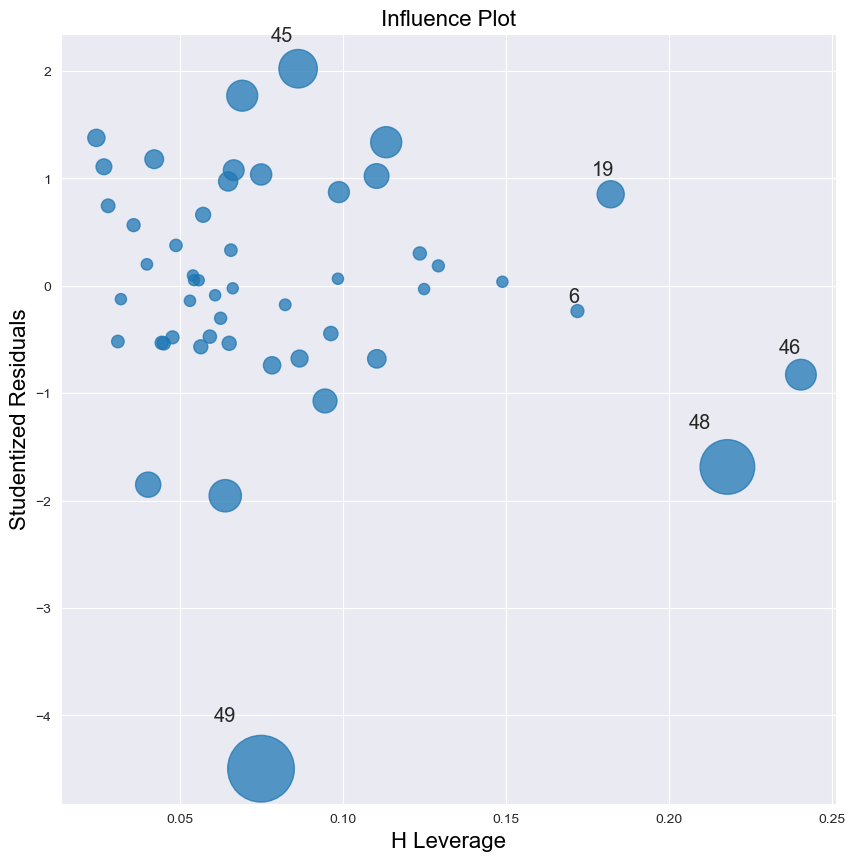

In [28]:
# 2. Leverage Value using High Influence Points : Points beyond Leverage_cutoff value are influencers
fig,ax=plt.subplots(figsize=(10,10))
fig=influence_plot(model,ax = ax)

We can see data points which are highly influential like 46,48 and 49.
We can see the data point of 49 as the outlier and one of the most influential point.

We have created a plot using the influence_plot function of a model object.
However, in general, an influence plot is a visual tool used to identify influential data points in a regression model. In a linear regression, these points have a high leverage, meaning they have a large impact on the estimated coefficients of the model. Additionally, influential points have a high residual, meaning they have a large influence on the predicted response variable.

The influence_plot function typically generates a plot with the standardized residuals on the y-axis and the leverage values on the x-axis. Points that fall outside of a certain cutoff value for leverage (usually 2 * (p+1)/n, where p is the number of predictors and n is the sample size) are considered high leverage points. Points that fall outside of a certain cutoff value for standardized residuals (usually +/- 2 or 3) are considered influential points.

We can clearly observe that the the leverage value of 49 is a highly influential point or an outlier as we say.

In [30]:
#Leverage Cut off Value = 2*(p+1)/n ; p = no.of features/columns & n = no. of datapoints
p=startup.shape[1]
n=startup.shape[0]
leverage_cutoff = 2*(p+1)/n
leverage_cutoff

0.2

This value represents a threshold for identifying influential data points in a regression analysis. Data points with leverage values greater than the leverage cutoff value may have a large impact on the regression model and should be further investigated.


#### Improving the Model

In [31]:
#Fetching the details of the 49th row
startup.iloc[49]

Research_Expenditure          0.00
Administration           116983.80
Marketing_Expenditure     45173.06
Profit                    14681.40
Name: 49, dtype: float64

In [33]:
# Creating a copy of data so that original dataset is not affected
startup_new=startup.copy()
startup_new

,Research_Expenditure,Administration,Marketing_Expenditure,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94
5,131876.90,99814.71,362861.36,156991.12
6,134615.46,147198.87,127716.82,156122.51
7,130298.13,145530.06,323876.68,155752.60
8,120542.52,148718.95,311613.29,152211.77
9,123334.88,108679.17,304981.62,149759.96


#### Model Deletion Diagnostics and Final Model

In [37]:
while np.max(c)>0.2 :
    model = smf.ols('Profit~Research_Expenditure+Administration+Marketing_Expenditure',data=startup_new).fit()
    (c,_) = model.get_influence().cooks_distance
    c
    np.argmax(c) , np.max(c)
    #Drop the rows where the highly influential data point lies
    startup_new = startup_new.drop(startup_new.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
    startup_new
else:
    final_model = smf.ols('Profit~Research_Expenditure+Administration+Marketing_Expenditure',data=startup_new).fit()
    final_model.rsquared
    print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.9614129113440602


As, we can observed the r square value has a small increase in value from 0.95 to 0.96.
So, that will be considered an improvement in the model and hence it's good for the model.

In [39]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     357.1
Date:                Wed, 12 Apr 2023   Prob (F-statistic):           2.12e-30
Time:                        14:19:26   Log-Likelihood:                -482.62
No. Observations:                  47   AIC:                             973.2
Df Residuals:                      43   BIC:                             980.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept              5.823e+04   5905.368      9.860      0.000    4.63e+04    7.01e+04
Research_Expenditure      0.7642      0.041     18.704      0.000       0.682       0.847
Administration           -0.0532      0.044     -1.202      0.236      -0.142       0.036
Marketing_Expenditure     0.0251      0.015      1.696      0.097      -0.005       0.055
==============================================================================
Omnibus:                        0.366   Durbin-Watson:                   1.831
Prob(Omnibus):                  0.833   Jarque-Bera (JB):                0.530
Skew:                           0.028   Prob(JB):                        0.767
Kurtosis:                       2.483   Cond. No.                     1.57e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.57e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

As, we can observe from the above model. We see a small change in the value of R-square as it jumped from 0.95 to 0.96. The value of AIC and BIC have slightly decreased as well which is considered to be a good for the model predictions.

#### Model Predictions for the final model 

In [42]:
#New data for prediction is
new_data=pd.DataFrame({'Research_Expenditure':90000,'Administration':79770,'Marketing_Expenditure':97899},index=[0])
new_data

,Research_Expenditure,Administration,Marketing_Expenditure
0,90000,79770,97899


In [46]:
#Manual Prediction of Price
final_model.predict(new_data)

0    125220.425146
dtype: float64

From the above prediction, we get to know about the profit earned by the startup i.e 125220.42 .

In [47]:
#Automatic Prediction of Price 
prices_new=final_model.predict(startup_new)
prices_new

0     189144.021141
1     185571.505316
2     180343.992254
3     171860.489927
4     171153.336127
5     162804.123770
6     156477.343357
7     158187.870039
8     150255.251593
9     154352.656745
10    135977.904080
11    136546.022058
12    129455.572750
13    127661.509729
14    147998.542616
15    145793.706944
16    118010.693099
17    129938.578129
18    129669.713023
19    116105.658621
20    117938.402714
21    117474.656407
22    115854.360943
23    111858.337361
24    115352.079636
25    103683.989930
26    111491.723852
27    115392.974943
28    101954.513645
29    102912.662101
30    101740.441122
31     99040.236547
32    100968.977775
33    100540.396562
34     90608.105042
35     94025.014882
36     78421.052027
37     94122.405580
38     74828.161109
39     87671.677996
40     78232.195211
41     79164.837264
42     74891.654066
43     64193.943484
44     67653.399768
45     52436.773768
46     51024.934949
dtype: float64

The "final_model" is used to predict profit for a set of new startups. The set of new startups is likely stored in a variable called "startup_new".


The "predict" method of the final_model is then used to make predictions for the new startups. The resulting predicted profits are stored in a variable called "prices_new".